In [7]:
import pandas as pd
import datetime

df = pd.read_csv('corporate_issuance.csv')
df['carrydate'] = pd.to_datetime(df['carrydate'], format="%d%b%Y")
df['maturitydate'] = pd.to_datetime(df['maturitydate'], format="%d%b%Y")
df['redemption_beginning'] = pd.to_datetime(df['redemption_beginning'], format="%d%b%Y")
df.head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,multimktornot,creditrating,issuer_rating,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,A/365,CNY,14sep2020,09sep2050,1,0,1
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1
3,102704.IB,2010-09-20,2040-09-20,2040-09-20,30.0,1,10汇金04,中央汇金投资有限责任公司,2.500000e+10,固定利率,...,否,-,NaN,ACT/ACT,CNY,25sep2010,19sep2040,0,0,1
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,否,AAA,AAA,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1


In [8]:
issuers = list(df['issuer_actual'].unique())
len(issuers)

7191

In [9]:
df['interesttype'].unique()

array(['固定利率', '累进利率', '浮动利率'], dtype=object)

In [10]:
# 只有单利，没有复利
df['paymenttype'].unique()

array(['单利'], dtype=object)

In [11]:
df[df['issuer_actual'] == '中国国家铁路集团有限公司'].head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,multimktornot,creditrating,issuer_rating,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,A/365,CNY,14sep2020,09sep2050,1,0,1
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,否,AAA,AAA,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1
5,2180412.IB,2021-09-30,2051-09-30,2051-09-30,30.0,1,21铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,11oct2021,29sep2051,1,0,1


In [12]:
max(df[df['issuer_actual'] == '中国国家铁路集团有限公司']['carrydate'])

Timestamp('2022-11-10 00:00:00')

In [13]:
min(df[df['issuer_actual'] == '中国国家铁路集团有限公司']['redemption_beginning'])

Timestamp('2000-01-20 00:00:00')

In [14]:
# 统计每个年份的发行量
df['year'] = df['carrydate'].dt.year
df['month'] = df['carrydate'].dt.month
df['day'] = df['carrydate'].dt.day
df['year'].value_counts().sort_index()

year
1994        1
1996        4
1997        8
1998       32
1999       48
2000       13
2001       11
2002       24
2003       31
2004       28
2005      144
2006      343
2007      363
2008      414
2009      771
2010      966
2011     1454
2012     2690
2013     2795
2014     4099
2015     5077
2016     6648
2017     4834
2018     5897
2019     7349
2020     9488
2021    10655
2022     9426
Name: count, dtype: int64

In [19]:
# 划定时间范围：2011/1 - 2022/12
# 按月份来划分时间节点，每个时间节点都是该月的最后一天，例如2011/1/31
# 因此，只要到期时间大于这个时间节点，就只考虑付息，如果到期时间在这个时间节点和上一个时间节点之间，就考虑付息和本金，如果到期时间小于等于上一个时间节点，就不考虑了

start = datetime.datetime(2011, 1, 31)
end = datetime.datetime(2022, 12, 31)
f = 36

# 新建一个dataframe，每一列都是一个issuer，每一行都是一个时间节点

time_nodes = pd.date_range(start + pd.DateOffset(months=1), end + pd.DateOffset(months=f), freq='M')
result_df = pd.DataFrame(index=time_nodes, columns=issuers)

# 遍历每个issuer，计算指定时间点应还的金额
for issuer in issuers:
    issuer_data = df[df['issuer_actual'] == issuer].copy()
    for time_node in time_nodes:
        # 计算应还金额的逻辑
        # 这里假设应还金额为某个计算结果
        # 筛选所有到期时间在这个时间节点和上一个时间节点之间的债券
        pre = time_node - pd.DateOffset(months=f)
        # 提取carrydate的月和日，将timenode的年赋给它
        # pre = pre.replace(year=time_node.year)
        #
        bonds_due = issuer_data[(issuer_data['maturitydate'] > pre) & (issuer_data['maturitydate'] <= time_node)]
        
        # 替换carrydate的年份
        def replace_year(date, year):
            try:
                return date.replace(year=year)
            except ValueError:
                return date
        
        issuer_data.loc[:, 'carrydate_replaced'] = issuer_data['carrydate'].apply(lambda x: replace_year(x, time_node.year) if time_node.month != 1 else replace_year(x, time_node.year - 1))
        
        pay_interest = issuer_data[
            (issuer_data['maturitydate'] > time_node) & 
            (issuer_data['carrydate_replaced'] <= time_node) & 
            (issuer_data['carrydate_replaced'] > pre)
        ]
        amount_due = bonds_due['issueamount'].sum() + (pay_interest["couponrate"] / 100 * pay_interest['issueamount']).sum()
        result_df.at[time_node, issuer] = amount_due

# 查看结果
print(result_df.head())

/var/folders/lz/_19n5kms58n06xljb83n0g3r0000gn/T/ipykernel_2460/1446229383.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_nodes = pd.date_range(start + pd.DateOffset(months=1), end + pd.DateOffset(months=f), freq='M')


              中国国家铁路集团有限公司   中央汇金投资有限责任公司 中国长江电力股份有限公司,中国长江三峡集团有限公司  \
2011-02-28   75384000000.0   2098900000.0              6000000000.0   
2011-03-31   88677900000.0   4474100000.0              6000000000.0   
2011-04-30  128203900000.0   7436800000.0              6000000000.0   
2011-05-31  160617400000.0   9708300000.0              6000000000.0   
2011-06-30  172229800000.0  12151000000.0              6000000000.0   

            北京保障房中心有限公司    中国大唐集团有限公司 河北建设投资集团有限责任公司    山东高速集团有限公司  \
2011-02-28          0.0  2001900000.0     40500000.0  1295830000.0   
2011-03-31          0.0  2954100000.0    218600000.0  2275030000.0   
2011-04-30  142050000.0  4202630000.0    425750000.0  3441202000.0   
2011-05-31  142050000.0  6240480000.0    659650000.0  4307002000.0   
2011-06-30  142050000.0  7299480000.0   1139550000.0  5034752000.0   

              武汉地铁集团有限公司      中国中信有限公司 中国长江三峡集团有限公司,中国长江电力股份有限公司  ...  \
2011-02-28   228000000.0   451850000.0                       0.0  ...   
2011-0

In [20]:
result_df.to_csv('result_with_interest.csv')

In [21]:
def hhi(cash_flows):
    res = 0
    total=  sum(cash_flows)
    for cash_flow in cash_flows:
        res += (cash_flow / total) ** 2
    return res

time_nodes = pd.date_range(start, end, freq='M')
hhi_df = pd.DataFrame(index=time_nodes, columns=issuers)

# 以36个月为时间窗口，计算每个时间节点从其一个月后开始的时间窗口内的HHI
for issuer in issuers:
    issuer_data = result_df[issuer].copy()
    for time_node in time_nodes:
        # 取time_node + 1 到 time_node + 36个月的数据
        cash_flows = issuer_data.loc[time_node + pd.DateOffset(months=1):time_node + pd.DateOffset(months=f)].dropna().values
        hhi_df.at[time_node, issuer] = hhi(cash_flows)
    
print(hhi_df.head())

/var/folders/lz/_19n5kms58n06xljb83n0g3r0000gn/T/ipykernel_2460/3315514448.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_nodes = pd.date_range(start, end, freq='M')
/var/folders/lz/_19n5kms58n06xljb83n0g3r0000gn/T/ipykernel_2460/3315514448.py:5: RuntimeWarning: invalid value encountered in scalar divide
  res += (cash_flow / total) ** 2


           中国国家铁路集团有限公司 中央汇金投资有限责任公司 中国长江电力股份有限公司,中国长江三峡集团有限公司 北京保障房中心有限公司  \
2011-01-31     0.030745     0.036365                  0.030451    0.043375   
2011-02-28     0.030222     0.036365                  0.030635    0.043375   
2011-03-31      0.02974     0.036365                   0.03082    0.043375   
2011-04-30     0.029417     0.036365                  0.031008    0.043375   
2011-05-31     0.029201     0.036365                  0.031198    0.043375   

           中国大唐集团有限公司 河北建设投资集团有限责任公司 山东高速集团有限公司 武汉地铁集团有限公司  中国中信有限公司  \
2011-01-31   0.042817       0.039099   0.035091   0.035512  0.031229   
2011-02-28   0.041689       0.037729   0.034857   0.035512  0.031229   
2011-03-31    0.04092       0.036661   0.034661   0.035512  0.031229   
2011-04-30   0.040484       0.035882   0.034509   0.035512  0.031229   
2011-05-31   0.040314       0.036304    0.03439   0.035512  0.031229   

           中国长江三峡集团有限公司,中国长江电力股份有限公司  ... 中原证券股份有限公司 瑞银证券有限责任公司  \
2011-01-31                  0.0

In [22]:
hhi_df.to_csv('hhi.csv')

2011-01-31    0.044271
2011-02-28    0.044166
2011-03-31    0.044170
2011-04-30    0.044145
2011-05-31    0.044156
                ...   
2022-08-31    0.044214
2022-09-30    0.044193
2022-10-31    0.044488
2022-11-30    0.044709
2022-12-31    0.046494
Freq: ME, Length: 144, dtype: float64


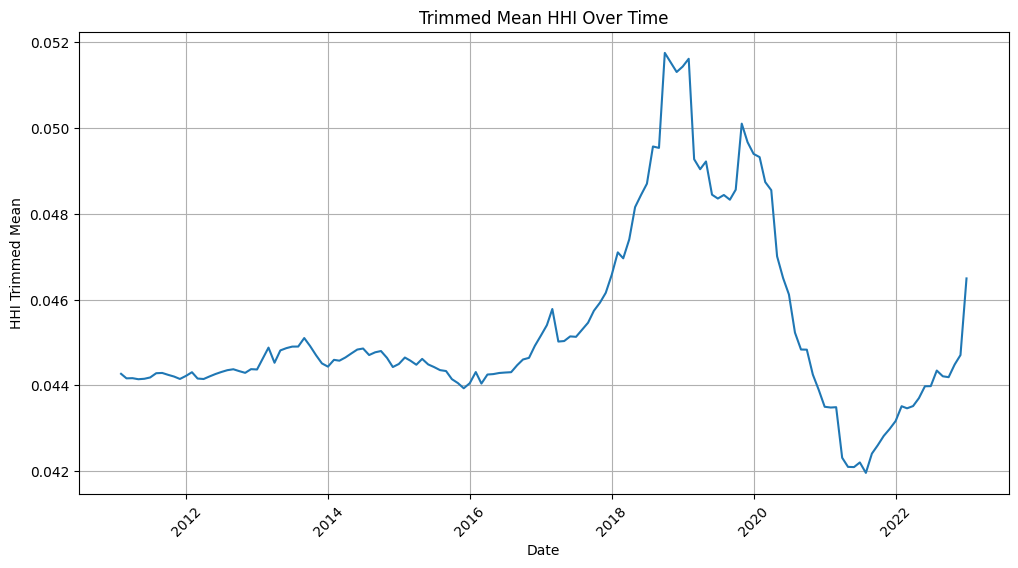

In [27]:
import matplotlib.pyplot as plt
def trim_mean(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    trimmed_series = series[(series >= lower_bound) & (series <= upper_bound)]
    return trimmed_series.mean()
# 对每个时间点（索引）进行处理
trimmed_means = pd.Series(index=hhi_df.index)

for date in hhi_df.index:
    # 获取该时间点的所有公司的HHI值
    row_values = hhi_df.loc[date]
    # 对该时间点的值进行修剪平均
    trimmed_means[date] = trim_mean(row_values)

# 查看结果
print(trimmed_means)

# 可视化时间序列
plt.figure(figsize=(12, 6))
plt.plot(trimmed_means.index, trimmed_means.values)
plt.title('Trimmed Mean HHI Over Time')
plt.xlabel('Date')
plt.ylabel('HHI Trimmed Mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

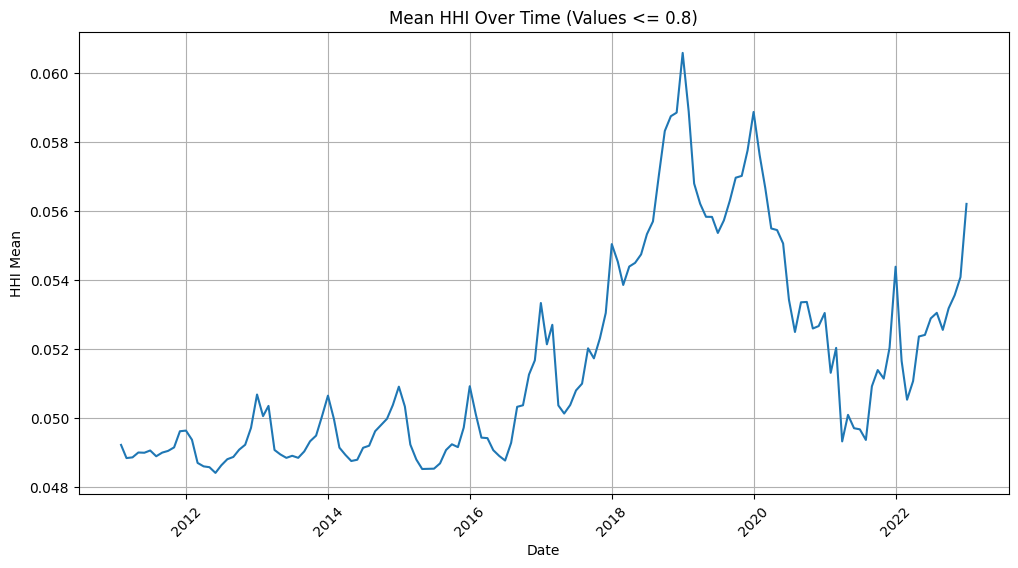

In [28]:
# 对每个时间点处理
filtered_means = pd.Series(index=hhi_df.index)

for date in hhi_df.index:
    # 获取该时间点的所有公司的HHI值
    row_values = hhi_df.loc[date]
    # 筛选掉大于0.8的值并计算平均值
    filtered_means[date] = row_values[row_values <= 0.8].mean()

# 可视化时间序列
plt.figure(figsize=(12, 6))
plt.plot(filtered_means.index, filtered_means.values)
plt.title('Mean HHI Over Time (Values <= 0.8)')
plt.xlabel('Date')
plt.ylabel('HHI Mean')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()